# ESA 9 Classification

# Task1 Data clean, imputation

### 1. in experience, replace >20 to 21; <1 to 1, and convert this as a numerical column


In [20]:
import pandas as pd
import numpy as np

train = pd.read_csv('C:/Users/osual/OneDrive/Dokumente/Master/Data_Science/ESA9/aug_train.csv')
test = pd.read_csv('C:/Users/osual/OneDrive/Dokumente/Master/Data_Science/ESA9/aug_test.csv')

train['experience'] = train['experience'].replace({'>20': '21', '<1': '1'}).astype(float)
test['experience'] = test['experience'].replace({'>20': '21', '<1': '1'}).astype(float)

train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,NaN,5.0,NaN,never,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,>4,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,Public Sector,>4,26,0
3,0.624,Male,No relevent experience,Full time course,High School,NaN,1.0,NaN,never,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,21.0,NaN,>4,46,0


In [21]:
test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,NaN,Has relevent experience,Full time course,Graduate,Other,3.0,Pvt Ltd,1,134,0
1,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,5.0,Early Stage Startup,1,34,1
2,0.767,NaN,Has relevent experience,Full time course,Graduate,STEM,10.0,Pvt Ltd,2,90,0
3,0.910,Male,No relevent experience,NaN,High School,NaN,10.0,NaN,never,42,0
4,0.624,Male,Has relevent experience,Part time course,Graduate,STEM,3.0,Pvt Ltd,1,198,0


### 2. in last_new_job, replace >4 to 5; never to 0, and convert this as a numerical column

In [22]:
train['last_new_job'] = train['last_new_job'].replace({'>4': '5', 'never': '0'}).astype(float)
test['last_new_job'] = test['last_new_job'].replace({'>4': '5', 'never': '0'}).astype(float)

train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,NaN,5.0,NaN,0.0,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,5.0,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,Public Sector,5.0,26,0
3,0.624,Male,No relevent experience,Full time course,High School,NaN,1.0,NaN,0.0,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,21.0,NaN,5.0,46,0


### 3. If the column is categorical, impute the missing value as its mode. If the column is numerical, impute the missing value as its median

In [23]:
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = test[col].fillna(test[col].mode()[0])
    else:
        test[col] = test[col].fillna(test[col].median())
        
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,STEM,5.0,Pvt Ltd,0.0,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,Pvt Ltd,5.0,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,Public Sector,5.0,26,0
3,0.624,Male,No relevent experience,Full time course,High School,STEM,1.0,Pvt Ltd,0.0,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,21.0,Pvt Ltd,5.0,46,0


# Task2 Classification

### 1. Build a classification model from the training set ( you can use any algorithms)

Random Forest

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.get_dummies(train)
test = pd.get_dummies(test)

train, test = train.align(test, join='left', axis=1, fill_value=0)

X = train.drop(columns=['target'])
y = train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=50)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

### 2. generate the confusion matrix and calculate the accuracy, precision, recall, and F1-score on training set. 

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1-score: 1.0
Training Confusion Matrix: 
[[1266    0]
 [   0  414]]


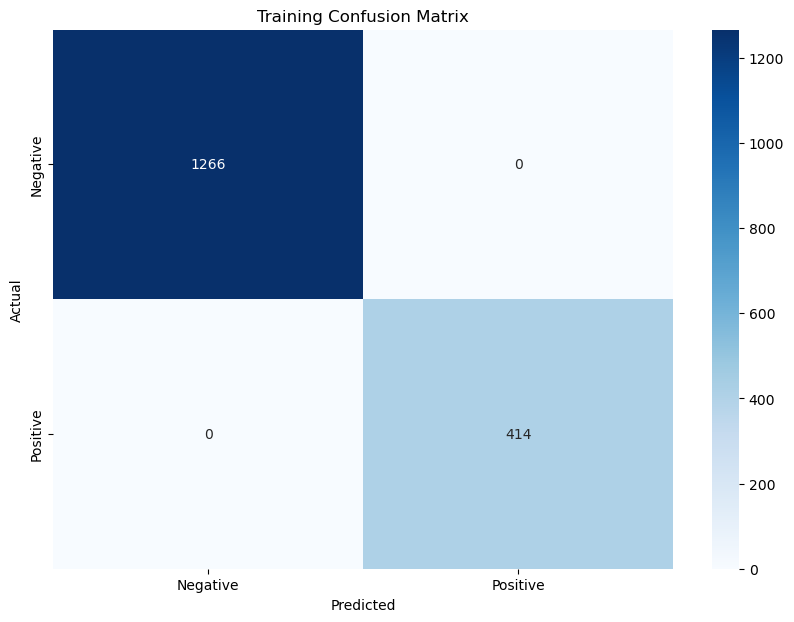

In [31]:
y_train_pred = model.predict(X_train)
train_cm = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Training Precision: {train_precision}')
print(f'Training Recall: {train_recall}')
print(f'Training F1-score: {train_f1}')
print(f'Training Confusion Matrix: \n{train_cm}')

plt.figure(figsize=(10, 7))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Training Confusion Matrix')
plt.show()

### 3. Applying the model in the test set and generating the prediction

In [32]:
y_test_pred = model.predict(test.drop(columns=['target']))
y_test = test['target']

### 4. generate the confusion matrix from the test set and calculate the accuracy, precision, recall, and F1-score

Test Accuracy: 0.8
Test Precision: 0.5833333333333334
Test Recall: 0.3181818181818182
Test F1-score: 0.4117647058823529
Test Confusion Matrix: 
[[73  5]
 [15  7]]


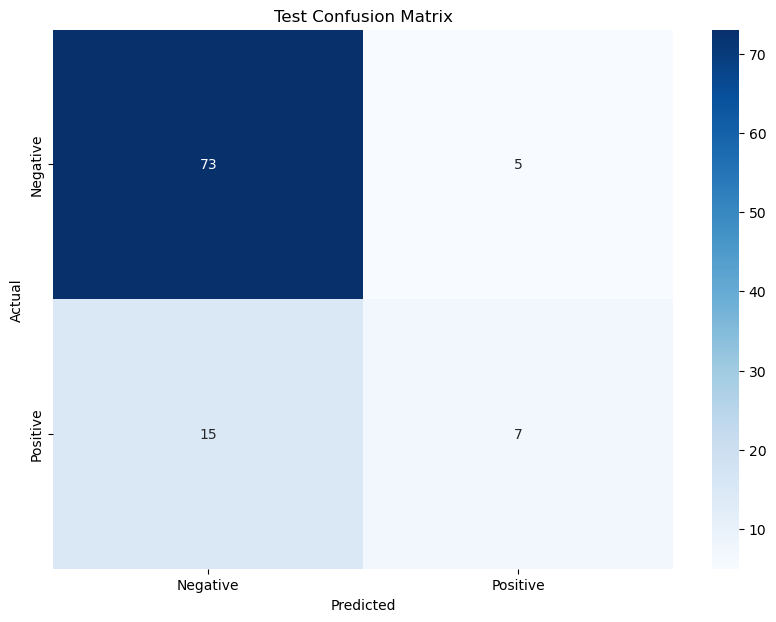

In [33]:
test_cm = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1-score: {test_f1}')
print(f'Test Confusion Matrix: \n{test_cm}')

plt.figure(figsize=(10, 7))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

### 5. compare the results between the training and test set

In [34]:
print(f"Training set metrics:\nAccuracy: {train_accuracy}\nPrecision: {train_precision}\nRecall: {train_recall}\nF1-score: {train_f1}")
print(f"Test set metrics:\nAccuracy: {test_accuracy}\nPrecision: {test_precision}\nRecall: {test_recall}\nF1-score: {test_f1}")

Training set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Test set metrics:
Accuracy: 0.8
Precision: 0.5833333333333334
Recall: 0.3181818181818182
F1-score: 0.4117647058823529


Die Metriken für das Training Set zeigen perfekte Werte (Accuracy, Precision, Recall und F1-Score sind alle 1.0). Das deutet darauf hin, dass das Modell die Trainingsdaten vollständig richtig klassifiziert hat. Dies könnte jedoch ein Hinweis auf Overfitting sein, da das Modell möglicherweise zu stark an den Trainingsdaten angepasst ist und nicht gut auf neue Daten generalisiert.

Im Vergleich dazu sind die Metriken für das Test Set deutlich schlechter. Die Accuracy liegt bei 0.8, was immer noch ganz gut ist, aber die Precision ist nur 0.58 und der Recall bei 0.32, was darauf hinweist, dass das Modell viele False Positives und False Negatives produziert. Der F1-Score von 0.41 bestätigt, dass das Modell insgesamt in der Testumgebung suboptimal performt.

Zusammenfassend deutet der große Unterschied zwischen den Trainings- und Testmetriken darauf hin, dass das Modell zwar auf den Trainingsdaten perfekt funktioniert, aber auf neuen, unbekannten Daten Schwierigkeiten hat. Hier wäre es sinnvoll, das Modell weiter zu optimieren oder andere Techniken zu verwenden, um die Generalisierungsfähigkeit zu verbessern.

### predict the probability of a candidate looking for a new job or will work for the company, as well as interpreting affected factors on employee decision.

In [43]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('classifier', RandomForestClassifier(random_state=50)) 
])

pipeline.fit(X, y)

test_features = test.drop(columns=['target'])
probabilities = pipeline.predict_proba(test_features)

print("Probabilities of looking for a new job or working for the company (class 1):")
print(probabilities[:, 1])

model = pipeline.named_steps['classifier']
feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


Probabilities of looking for a new job or working for the company (class 1):
[0.4  0.35 0.19 0.29 0.5  0.05 0.21 0.35 0.02 0.2  0.02 0.04 0.47 0.07
 0.19 0.21 0.05 0.25 0.19 0.   0.1  0.19 0.04 0.74 0.19 0.36 0.36 0.45
 0.02 0.17 0.79 0.17 0.12 0.07 0.17 0.2  0.65 0.56 0.59 0.02 0.1  0.54
 0.11 0.   0.67 0.16 0.16 0.23 0.39 0.08 0.27 0.36 0.11 0.45 0.14 0.08
 0.46 0.17 0.05 0.05 0.06 0.08 0.2  0.31 0.43 0.59 0.05 0.29 0.22 0.21
 0.23 0.03 0.81 0.32 0.19 0.04 0.1  0.34 0.35 0.04 0.06 0.19 0.25 0.05
 0.34 0.04 0.17 0.35 0.08 0.34 0.04 0.43 0.07 0.12 0.35 0.06 0.29 0.28
 0.21 0.07]

Feature Importances:
                                        Feature  Importance
0                        city_development_index    0.242509
3                                training_hours    0.229337
1                                    experience    0.154011
2                                  last_new_job    0.079246
28                         company_type_Pvt Ltd    0.036263
5                               

#### Wahrscheinlichkeiten:
Einige Werte sind relativ hoch, wie z.B. 0.74, 0.79, 0.81. Das bedeutet, dass es eine hohe Wahrscheinlichkeit gibt, dass diese Kandidaten entweder nach einem neuen Job suchen oder im Unternehmen arbeiten werden.

Einige Werte sind sehr niedrig, wie z.B. 0.02, 0.05. Das bedeutet, dass es eine geringe Wahrscheinlichkeit gibt, dass diese Kandidaten entweder nach einem neuen Job suchen oder bei dem Unternehmen arbeiten werden.

Werte wie 0.29, 0.35, 0.36 deuten auf eine mittlere Wahrscheinlichkeit hin.

#### Features: 
Die Feature-Wichtigkeiten geben an, wie viel jedes Feature zur Entscheidungsfindung des Modells beiträgt. 

Höchste Wichtigkeit:
- city_development_index (0.242509)
- training_hours (0.229337)
- experience (0.154011)

#### Ergebnis:
Höhere Wahrscheinlichkeiten deuten auf eine höhere Wahrscheinlichkeit hin, dass der Kandidat einen neuen Job sucht oder bei dem Unternehmen arbeitet. Niedrigere Wahrscheinlichkeiten deuten darauf hin, dass der Kandidat eher nicht interessiert ist.

Feature-Wichtigkeiten: Der city_development_index und training_hours sind die wichtigsten Merkmale, die die Wahrscheinlichkeit beeinflussen, während Merkmale wie education_level_Primary School und company_type_Other weniger Einfluss haben.

### Bonus

Um die Leistung des Modells zu verbessern, gibt es mehrere Ansätze, die man in Betracht ziehen könnte:

- Kreuzvalidierung: Um eine bessere Einschätzung der Modellleistung zu bekommen und Überanpassung zu vermeiden, könnte Kreuzvalisierung anstelle einer Train-Test-Split-Validierung verwendet werden. Dies sorgt für eine robustere Bewertung des Modells auf verschiedenen Datenpartitionen.Hierzu könnte der folgende Code hinzugefügt werden um eine 5-fache Kreuzvalisierung zu schaffen: cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

- Datensatzbalancierung: Ungleichgewichte in den Klassen, könnten durch Techniken wie Oversampling der Minderheitsklasse oder Undersampling der Mehrheitsklasse angewendet werden, um die Klassifikation zu verbessern.

- Feature-Auswahl: Die Reduktion der Anzahl der Merkmale auf die wichtigsten kann helfen, das Modell weniger anfällig für Overfitting zu machen und die Leistung zu verbessern.

- Hyperparameter-Tuning: Die Leistung eines Random Forest Modells kann durch Feinabstimmung der Hyperparameter wie die Anzahl der Bäume und die maximale Tiefe der Bäume verbessert werden. 

In [38]:
# Ausprobieren der Kreuzvalidierung

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

train = pd.read_csv('C:/Users/osual/OneDrive/Dokumente/Master/Data_Science/ESA9/aug_train.csv')
test = pd.read_csv('C:/Users/osual/OneDrive/Dokumente/Master/Data_Science/ESA9/aug_test.csv')

train['experience'] = train['experience'].replace({'>20': '21', '<1': '1'}).astype(float)
test['experience'] = test['experience'].replace({'>20': '21', '<1': '1'}).astype(float)

train['last_new_job'] = train['last_new_job'].replace({'>4': '5', 'never': '0'}).astype(float)
test['last_new_job'] = test['last_new_job'].replace({'>4': '5', 'never': '0'}).astype(float)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

train, test = train.align(test, join='left', axis=1, fill_value=0)

X = train.drop(columns=['target'])
y = train['target']

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('classifier', RandomForestClassifier(random_state=50)) 
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy') 

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores)}')
print(f'Standard Deviation of Cross-Validation Accuracy: {np.std(cv_scores)}')


Cross-Validation Accuracy Scores: [0.77619048 0.74761905 0.75714286 0.75952381 0.78571429]
Mean Cross-Validation Accuracy: 0.7652380952380952
Standard Deviation of Cross-Validation Accuracy: 0.01376841170933425
